---
---
## Trabajo Práctico 3 - Probabilidad multidimensional
### Josefina Urquiza
---
---

7. **(Para entregar)** Simular una variable aleatoria $X = (X_1, X_2)$ que sigue una distribución binormal con parámetros $\mu_1 = 2.3$,  $\mu_2 = 1.5$, $\sigma_1 = 1.2$, $\sigma_2 = 0.5$ y correlación $\rho = 0.7$. Repetir la simulación 1000 veces. Calcular la fracción de eventos caen en la elipse $1\sigma$ y comparar con la probabilidad contenida dentro de dicha región. Graficar 10 de los datos simulados junto a la elipse 1σ.

Nota: un punto $(x_1, x_2)$ pertenece a la elipse $r\sigma$ si la forma cuadrática asociada $q(x_1, x_2) ≤ r$.

In [2]:
# Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import danatools
from numpy import linalg
print("Librerias ok")

Librerias ok


### Parámetros

In [3]:
# Simulamos 2 variables
mu = [2.3, 1.5]  # vector de media
sigma_x1 = 1.2    # desviación estándar de X1
sigma_x2 = 0.5    # desviación estándar de X2
rho = 0.7        # correlación

# Matriz de covarianza 2 formas de hacerlo:
# -- 01. lista 
# cov_matrix = [[sigma_x1**2, rho * sigma_x1 * sigma_x2], 
#               [rho * sigma_x1 * sigma_x2, sigma_x2**2]]

# -- 02. numpy.ndarray con la libreria danatools
cov_matrix = danatools.covariance_matrix_2d(sigma_x1, sigma_x2, rho)

# Mostramos la matriz de covarianza
cov_matrix


array([[1.44, 0.42],
       [0.42, 0.25]])

La diagonal con los valores 1.44 - 0.25 corresponde a las varianzas de las variables individuales. Mientras que los elementos fuera de la diagonal (0.42) representan la covarianza entre las variables $X_1$ y  $X_2$.

### Simulación de variables

In [6]:
# Generador de numeros aleatorios
rng = np.random.default_rng(seed=6870)

# Repetir la simulación 1000 veces
n_sims = 1000 

#Generamos la simulación
data = multivariate_normal.rvs(mu, cov_matrix, size=n_sims, random_state=rng)

# Pasamos los datos a un dataframe de pandas para manipularlos con más comodidad. 
df = pd.DataFrame({"X1": data[:,0], "X2": data[:,1]})

#Mostramos los primeros datos generado
df.head(10)


,X1,X2
0,3.178001,2.065608
1,3.172994,1.485824
2,1.322145,1.665009
3,2.601276,2.406701
4,4.013880,1.281618
5,0.362198,0.747164
6,2.356514,1.163778
7,0.546936,0.560943
8,2.737335,1.125839
9,3.874022,1.736421


Cada una de estas filas del dataframe representa una simulacion correspondiente a las dos variables segun los parametros $\mu_1$,  $\sigma$ y correlación $\rho$.

### Gráfico de dispersión con todos los datos simulados con distribución normal bivariada.

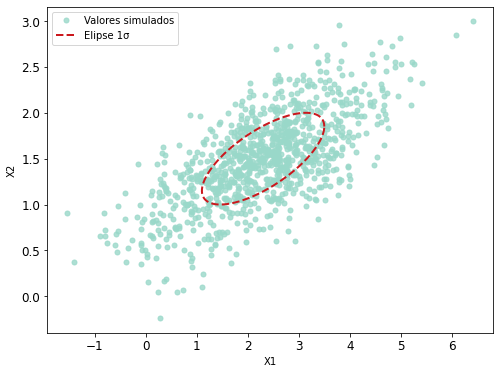

In [7]:
fig, ax = plt.subplots(figsize=(8, 6)) 
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.plot(df["X1"], df["X2"], ls='None', marker='o',color='#99d8c9', ms=5, alpha=0.8,label="Valores simulados")
# ax.plot(mu[0], mu[1], marker='o', ls='', label='$\mu$')
x_2sigma, y_2sigma = danatools.get_ellipse(mu, cov_matrix, nsigma=1)
ax.plot(x_2sigma, y_2sigma, color="#cb181d",linewidth=2,label="Elipse 1σ",ls="--")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.legend()
plt.show()



### Calcular la fracción de eventos caen en la elipse  1𝜎
  

In [8]:
# Matriz hessiana 
hessian_matrix = linalg.inv(cov_matrix)

#Forma cuadrática
v = data - mu #vector menos su media
# Sumatoria de las columnas
Q = np.sum((v @ hessian_matrix)* v, axis = 1)

# Comprobamos que tenga el mismo numero de datos de las simulaciones
print(len(Q))

# Contar los puntos que caen dentro de la elipse 1σ (q(x1, x2) <= 1)
puntos_elipse = np.sum(Q <= 1)


1000


In [9]:
#Resultados
print(f"Puntos dentro de la elipse de 1σ: {puntos_elipse:.2f}")
print(f"Fracción dentro de la elipse de 1σ: {puntos_elipse/n_sims:.5f}")

Puntos dentro de la elipse de 1σ: 414.00
Fracción dentro de la elipse de 1σ: 0.41400


#### Algunos comentarios:
En primer lugar calculamos la matriz Hessiana que hace referencia la inversa de la matriz de covarianza. Invertir la matriz de covarianza es un paso necesario para calcular la forma cuadrática asociada a la elipse.

Luego se calcula una matriz (v) que muestra la diferencia entre los datos y  el vector de las medias calculado anterioremente.

Posteriormente, se mutiplica esta matriz de diferencias (v) con la matriz Hessiana para aplicar la transformacion necesaria para la forma cuadrática.

Luego,  se sumaron los valores a lo largo de las columnas, para finalmente contar los puntos que caen dentro de la elipse de 1σ en la variable puntos_elipse.

En resumen, se calcula la forma cuadrática asociada a los puntos simulados respecto a la media y la matriz de covarianza de la distribución, para finalmente contar cuántos de esos puntos caen dentro de la elipse

#### Algunos comentarios de la clase:
La forma cuadrática nos define la elipse n sigmas.
Si la forma cuadratica es menor a 1 estamos adentro de la elipse de 1sigma y tenemos una cierta probabilidad de que los puntos caigan adentro del elipse.


### Comparar con la probabilidad contenida dentro de dicha región.

In [10]:
# Ahora la comparamos con la PDF

# Calcular la densidad de probabilidad para cada punto
pdf = multivariate_normal.pdf(data, mean=mu, cov=cov_matrix)

# Comparar con la probabilidad teórica de estar dentro de la elipse
densidad_pdf = multivariate_normal.pdf(mu, mean=mu, cov=cov_matrix) * np.exp(-0.5)

# Contar los puntos que caen dentro de la elipse 1σ según la densidad
puntos_elipse_teorica = np.sum(pdf >= densidad_pdf)
fraccion_elipse_teorica = puntos_elipse_teorica / n_sims
print(f"Fracción de puntos dentro de la elipse 1σ segun PDF teorica: {fraccion_elipse_teorica:.5f}")


Fracción de puntos dentro de la elipse 1σ segun PDF teorica: 0.41400


Podemos ver que en ambos casis deben dar resultados consistentes, ya que ambos se basan en la misma definición de una elipse  de 1𝜎, pero lo hacen desde diferentes enfoques: la primera de forma cuadrática y la segunda forma (teorica) con la densidad de probabilidad mostrada con la pdf.

### Graficar

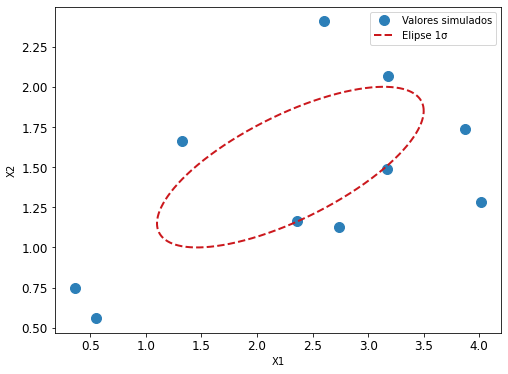

In [11]:
#En este caso solo mostramos 10 valores
fig, ax = plt.subplots(figsize=(8, 6)) 
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.plot(df["X1"][:10,], df["X2"][:10,], ls='None', marker='o',color='#2c7fb8',  ms=10, label="Valores simulados")
# ax.plot(mu[0], mu[1], marker='o', ls='', label='$\mu$')
x_2sigma, y_2sigma = danatools.get_ellipse(mu, cov_matrix, nsigma=1)
ax.plot(x_2sigma, y_2sigma, color="#cb181d",linewidth=2,label="Elipse 1σ",ls="--")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.legend()
plt.show()

## Conclusiones

- Los resultados de los valores simulados vs la probabilidad teorica deben dar como resultado valores cercanos, lo que valida que la simulación refleja correctamente las propiedades de la distribución normal bivariada. Esto se debe a que la fracción de puntos dentro de la elipse de 1𝜎 en los datos simulados es muy cercana a la probabilidad teórica calculada a partir de la PDF de la distribución.
